In [1]:
#import libraries
import numpy as np
import pandas as pd 
import tensorflow as tf
import nltk
import seaborn as sns
import re
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
#df=pd.read_excel('C:/Users/nakka/Documents/python/NLP/Emotion_final.xlsx') #Text data
df=pd.read_csv('C:/Users/nakka/Documents/python/NLP/Emotion_data.csv') #Text data
#EMBEDDING_FILE= f'C:/Users/nakka/Documents/python/NLP/glove.6B/glove.6B.100d.txt' #GloVe file path
df.head()

,Text,Emotion
0,i am feeling grouchy,anger
1,i think it s the easiest time of year to feel ...,anger
2,i feel irritated and rejected without anyone d...,anger
3,i already feel like i fucked up though because...,anger
4,i feel kinda appalled that she feels like she ...,anger


c:\Users\nakka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

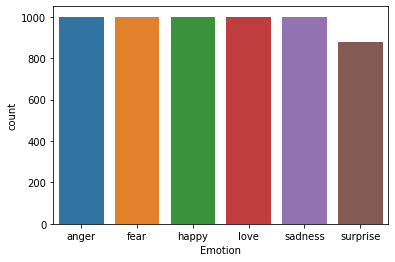

In [5]:
#Target Classes
sns.countplot(df['Emotion'])

In [3]:
df=df.dropna() #Drop rows with NA values
X=df.drop('Emotion',axis=1) #Input
y=df['Emotion'] #Output

In [4]:
messages=X.copy()
messages.reset_index(inplace=True) #Drop NA may cause inconsistency in index

In [5]:
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Text'][i]) #Remove Special Characters
    review = review.lower() #Lower case 
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #Remove stopwords
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nakka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# code for Glove word embedding  
# create the dict.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
  
# number of unique words in dict.
print("Number of unique words in dictionary=", len(tokenizer.word_index))
#print("Dictionary is = ", tokenizer.word_index)
  
# download glove and unzip it in Notebook.
# http://nlp.stanford.edu/data/glove.6B.zip

def embedding_for_vocab(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    # Adding again 1 because of reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix_vocab
    
# matrix for vocab: word_index
embedding_dim = 100
embedding_matrix_vocab = embedding_for_vocab('C:/Users/nakka/Documents/python/NLP/glove.6B/glove.6B.300d.txt', tokenizer.word_index, embedding_dim)
print("Dense vector for first word is => ", embedding_matrix_vocab[1])

Number of unique words in dictionary= 13050
Dense vector for first word is =>  [ 1.97870001e-01  1.01999998e-01  3.78490016e-02 -3.65559995e-01
  3.83109995e-03 -3.84149998e-01  1.15189999e-01  3.03449988e-01
  2.55950004e-01 -1.52020001e+00  2.73539990e-01 -3.74000013e-01
 -9.09299999e-02  1.69709995e-01 -4.99080002e-01  8.44699964e-02
 -5.46809971e-01 -2.16790006e-01  4.69720006e-01  1.38630003e-01
  3.01180005e-01  4.55309987e-01  3.01550001e-01  1.63269997e-01
 -6.13770008e-01  1.84790000e-01  3.99839997e-01 -1.86269999e-01
  1.76909998e-01  1.14500001e-01  1.92980006e-01  4.94919986e-01
 -7.96490014e-01 -9.20360029e-01 -1.21329999e+00  5.54000020e-01
 -2.20300004e-01  1.96129993e-01  4.05999988e-01  2.24849999e-01
  5.16109988e-02 -3.18470001e-01  9.20130014e-02 -6.14239991e-01
  4.40770000e-01  4.15239990e-01  1.64890006e-01 -3.98880005e-01
  2.38600001e-01  7.17469975e-02  5.74079990e-01 -4.04619992e-01
  4.03969996e-02 -7.93830007e-02 -1.58759996e-01  5.32570004e-01
  8.1009000

In [7]:
#Contains the pretrained GloVe weights for the words
voc_size=len(embedding_matrix_vocab)
print(voc_size)

13051


In [8]:
#Contains the pretrained GloVe weights for the words
voc_size=len(embedding_matrix_vocab)
print(voc_size)#One hot representation for input
onehot_repr=[one_hot(words, voc_size)for words in corpus]

#Finding max words
l = 0
for x in corpus:
    l = max(l,len(x.split(' ')))

#Padding the sequences for input
sent_length= l
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

13051
[[    0     0     0 ...  1780  5279 12820]
 [    0     0     0 ...  2620  7549 10103]
 [    0     0     0 ...  5279  9317  8237]
 ...
 [    0     0     0 ...  7874   734  4224]
 [    0     0     0 ... 12296  4224 11173]
 [    0     0     0 ...     0  4224  4379]]


In [9]:
#Encoding the target outputs to integers
label_encoder = preprocessing.LabelEncoder()

X_final=np.array(embedded_docs) #input to array
y = label_encoder.fit_transform(y)
y_final=np.array(y)
print(y_final)

[4 4 0 ... 1 1 1]


In [13]:
#X_final.shape,y_final.shape

In [10]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42) 
#Train-Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=21)
#X_train.shape,X_val.shape,X_test.shape

In [11]:
# Creating model
model=Sequential()
model.add(Embedding(voc_size, embedding_dim, weights=[embedding_matrix_vocab]))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01))) #L1 regularization
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1305100   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                        

In [12]:
model_save = ModelCheckpoint('weights.h5', save_best_only = True, save_weights_only = True, monitor = 'val_loss', mode = 'min', verbose = 1)
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=40,batch_size=64,callbacks = [model_save])

Epoch 1/40
215/215 [==============================] - ETA: 0s - loss: 3.7054 - accuracy: 0.3228
Epoch 00001: val_loss improved from inf to 1.64034, saving model to weights.h5
215/215 [==============================] - 12s 45ms/step - loss: 3.7054 - accuracy: 0.3228 - val_loss: 1.6403 - val_accuracy: 0.3262
Epoch 2/40
214/215 [============================>.] - ETA: 0s - loss: 1.5603 - accuracy: 0.3506
Epoch 00002: val_loss improved from 1.64034 to 1.44492, saving model to weights.h5
215/215 [==============================] - 9s 42ms/step - loss: 1.5603 - accuracy: 0.3509 - val_loss: 1.4449 - val_accuracy: 0.4560
Epoch 3/40
214/215 [============================>.] - ETA: 0s - loss: 1.2788 - accuracy: 0.5760
Epoch 00003: val_loss improved from 1.44492 to 1.09849, saving model to weights.h5
215/215 [==============================] - 9s 42ms/step - loss: 1.2780 - accuracy: 0.5764 - val_loss: 1.0985 - val_accuracy: 0.6785
Epoch 4/40
215/215 [==============================] - ETA: 0s - loss: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


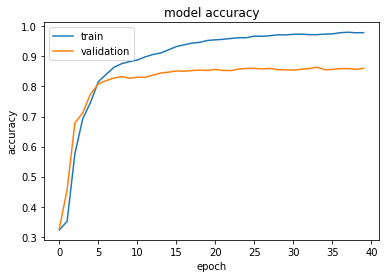

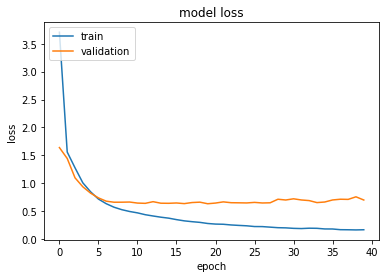

In [13]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
y_pred_test=model.predict(X_test).argmax(axis=1)
print(y_pred_test)
y_pred_train=model.predict(X_train).argmax(axis=1)
print(y_pred_train)
y_pred_val=model.predict(X_val).argmax(axis=1)
print(y_pred_val)

[2 0 4 ... 0 0 2]
[3 0 0 ... 1 4 2]
[5 1 4 ... 3 0 4]


In [15]:
#Accuracy score
print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
print("Testing accuracy: ",accuracy_score(y_test,y_pred_test))
print("Validation accuracy: ",accuracy_score(y_val,y_pred_val))

Training accuracy:  0.991553193038666
Testing accuracy:  0.8620689655172413
Validation accuracy:  0.860221316249272


In [16]:
model.save('weights.h5')

In [17]:
#Classification report
print(classification_report(y_test, y_pred_test, digits=5))

              precision    recall  f1-score   support

           0    0.87637   0.90762   0.89172       617
           1    0.83301   0.79849   0.81538       531
           2    0.90160   0.85590   0.87816      1381
           3    0.68466   0.75786   0.71940       318
           4    0.89838   0.91386   0.90606      1277
           5    0.69231   0.75000   0.72000       168

    accuracy                        0.86207      4292
   macro avg    0.81439   0.83062   0.82179      4292
weighted avg    0.86426   0.86207   0.86269      4292



Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


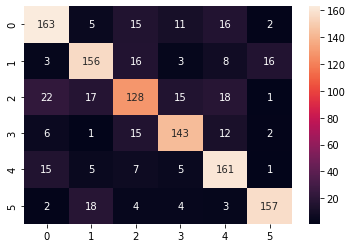

In [ ]:
#Confusion Matrix
print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,fmt="d"))

In [19]:
#Mapping of target classes using label-encoder
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

{'anger': 0, 'fear': 1, 'happy': 2, 'love': 3, 'sadness': 4, 'surprise': 5}


In [20]:
#Example
def predict_emotion(stri):
    review = re.sub('[^a-zA-Z]', ' ', stri)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    onehot_repr = [one_hot(review,voc_size)] 
    embed = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
    predicti = model.predict(embed)
    return label_encoder.classes_[np.argmax(predicti)]

In [21]:
predict_emotion("This is outrageous, how can you talk like that?")

'anger'

In [22]:
predict_emotion('He was speechless when he found out he was accepted to this new job')

'happy'

In [23]:
predict_emotion('i just don t feel as impressed and as happy with things like i used to')

'surprise'

In [24]:
predict_emotion('i feel like a miserable piece of garbage')

'sadness'

In [25]:
predict_emotion('you look scary and strange')

'fear'

In [26]:
predict_emotion('oops it is strange')

'surprise'

In [27]:
predict_emotion('i feel like some of you have pains and you cannot imagine becoming passionate about the group or the idea that is causing pain')

'love'

In [28]:
predict_emotion('it is painful to me')

'sadness'

In [29]:
predict_emotion('im passionate about my future')

'happy'

In [30]:
predict_emotion('i feel vulnerable and alone')

'fear'

In [31]:
predict_emotion('i feel alone')

'sadness'

In [26]:
predict_emotion('all of us are living happily')

'happy'

In [27]:
predict_emotion('im feeling good and happy')

'happy'

In [34]:
predict_emotion('He is not so happy today')

'sadness'

In [35]:
predict_emotion('Due to heavy rain he is unhappy')

'sadness'

In [36]:
predict_emotion('The tears came , and rapidly dissolved her angry expression to one of utter despai')

'sadness'

In [37]:
predict_emotion('Shelley sat down beside the patient and smiled at him , the cheerfulness coming from somewhere behind her deep despai')

'sadness'

In [38]:
predict_emotion('The look of deep sorrow on her face cut into him far more deeply than any aggresive words could have done')

'love'

In [28]:
predict_emotion('i feel calm just thinking about it')

'happy'

In [29]:
predict_emotion('he is unhappy')

'sadness'